Reference: [Jeremy Rath et al 2022 ApJ 932 61](https://iopscience.iop.org/article/10.3847/1538-4357/ac5f57/meta)

The Hamiltonian of our system is
$$H(\phi,p,t) = \frac{p^2}{2} - \epsilon_1\cos{(\phi)} - \epsilon_2\cos{(r(\phi-\nu t))}.$$
The corresponding Hamilton equations of motions are
$$\dot{\phi} = \frac{\partial H}{\partial p} = p,$$
and
$$\dot{p} = -\frac{\partial H}{\partial \phi} = -\epsilon_1 \sin{(\phi)} - r\epsilon_2\sin{(r(\phi-\nu t))}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

We solve for $\phi(t)$ and $p(t)$ numerically. Then we sample at times $t$, such that $r\nu t = 2k\pi$ ($k\in\mathbb{Z}^+$), and create a phase-space plot.

In [2]:
def hamilton(y,t,e1,e2,r,nu):
    phi, p = y
    dydt = [p, -e1*np.sin(phi) - r*e2*np.sin(r*(phi-nu*t))]
    return dydt

In [3]:
# create different initial conditions
ic = [[x,y] for x in np.linspace(-np.pi/2, np.pi/2, 20) for y in np.linspace(-2, 12, 30)]

In [4]:
# solve and plot
def phasePlot(e1, e2, r, nu):
    num = 101  # number of sampled time
    t = np.linspace(0,num-1,num)*2*np.pi/(r*nu)
    
    plt.rcParams["figure.figsize"] = (8,8)
    for y0 in ic:
        sol = odeint(hamilton, y0, t, args=(e1,e2,r,nu))
        phi = (sol[:,0] + np.pi * np.ones(num)) % (2*np.pi) - np.pi * np.ones(num)  # wrap into [-pi,pi]
        plt.plot(phi, sol[:,1], 'k.', ms=0.2)
    plt.xlabel(r'$\phi$')
    plt.ylabel(r'$p$')
    plt.title(fr'phase-space plot for $\nu={nu}$')
    plt.show()

For $\epsilon_1=1, \epsilon_2=0.1, r=1,$ and $\nu=10$,

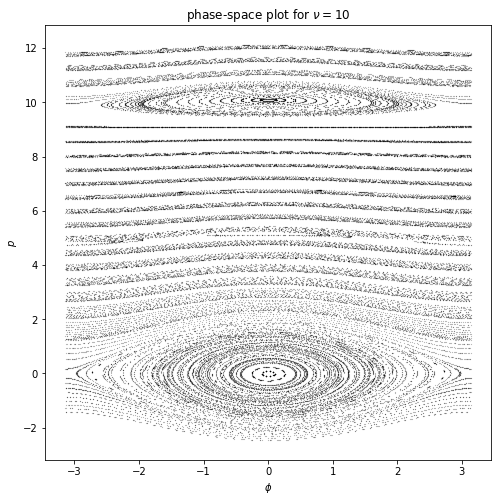

In [5]:
phasePlot(1, 0.1, 1, 10)

Now we try for smaller $\nu$ values.

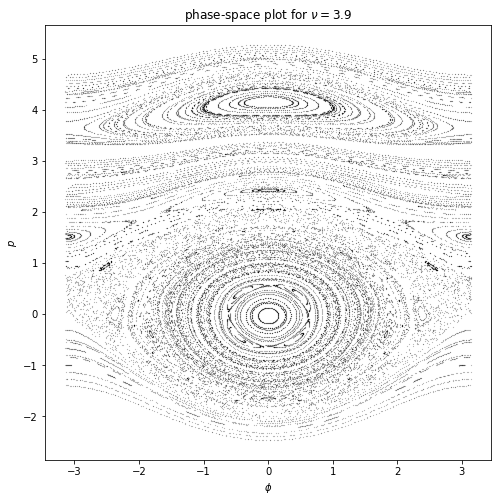

In [6]:
ic = [[x,y] for x in np.linspace(-np.pi/2, np.pi/2, 20) for y in np.linspace(-2, 5, 20)]
phasePlot(1, 0.1, 1, 3.9)

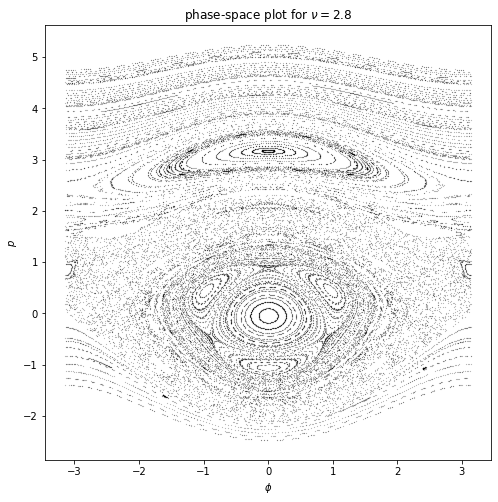

In [7]:
phasePlot(1, 0.1, 1, 2.8)

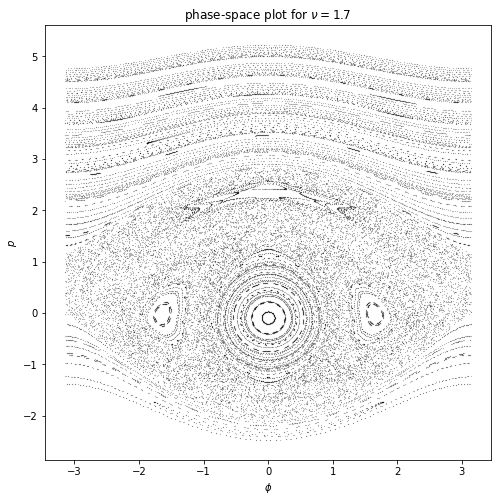

In [8]:
phasePlot(1, 0.1, 1, 1.7)